In [14]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from IPython.display import HTML

import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU, Flatten, Dense, Activation, Reshape, Input

from utils import load_weights, Box, yolo_net_out_to_car_boxes, draw_box

## Constructing the tiny-YOLO model

In [43]:
keras.backend.set_image_dim_ordering('th')  

## keras use 2 types of dim_ordering "tensorflow" and "theano"
## For 2D data (e.g. image), "tf" assumes (rows, cols, channels) while "th" assumes (channels, rows, cols).
## For 3D data, "tf" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while "th" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

In [46]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(448, 448, 3) , padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(32, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(64, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(128, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(256, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(512, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding="same"))
model.add(Conv2D(1024, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(1024, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(1024, (3,3), padding="same", strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1470))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 448, 448, 16)      448       
_________________________________________________________________
leaky_re_lu_71 (LeakyReLU)   (None, 448, 448, 16)      0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 224, 224, 16)      0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 224, 224, 32)      4640      
_________________________________________________________________
leaky_re_lu_72 (LeakyReLU)   (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 112, 112, 64)    

In [47]:
## Loading weights
load_weights(model, 'yolov3.weights')

In [48]:
imagePath = 'CarND-Vehicle-Detection/test_images/test1.jpg'
image = plt.imread(imagePath)
image_crop = image[300:650,500:,:]
resized = np.resize(image_crop,(448,448,3))

In [49]:
batch = resized
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
out = model.predict(batch)

In [50]:
boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.17)

/home/vinayak/Vehicle_Detection_Project/utils.py:75: RuntimeWarning: invalid value encountered in power
  bx.w =  cords[grid, b, 2] ** sqrt
/home/vinayak/Vehicle_Detection_Project/utils.py:76: RuntimeWarning: invalid value encountered in power
  print(bx.w)


ValueError: cannot convert float NaN to integer

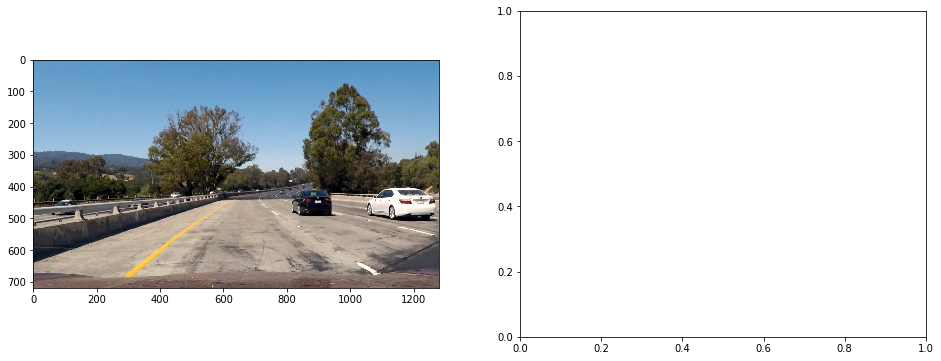

In [51]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.imshow(image)
ax2.imshow(draw_box(boxes,plt.imread(imagePath),[[500,1280],[300,650]]))

In [52]:
print(b for b in boxes)

<generator object <genexpr> at 0x7fa2f43730f8>
